# Title
The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [1]:
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
import math
import os

from moviepy.editor import VideoFileClip

from IPython.display import display, Markdown

import warnings
warnings.filterwarnings('ignore')

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data import
We retrieve all the required data for the analysis.

In [2]:
chess_images = glob.glob('./camera_cal/calibration*.jpg')
lane_images = glob.glob('./test_images/*.jpg')
extra_images = glob.glob('./extra_images/*.png')

image_size_chess = mpimg.imread(chess_images[0]).shape[1::-1]
image_size_lane = mpimg.imread(lane_images[0]).shape[1::-1]
image_size_extra = mpimg.imread(extra_images[0]).shape[1::-1]

print(f'{len(chess_images)} chess images for calibration with image size {image_size_chess}')
print(f'{len(lane_images)} lane images for with image size {image_size_lane}')
print(f'{len(extra_images)} extra images with image size {image_size_extra}')

20 chess images for calibration with image size (1280, 720)
8 lane images for with image size (1280, 720)
1 extra images with image size (1280, 720)


# All Functions

In [3]:
def plot_images(images, fig_name, title='', figsize=(8, 20)):
    n = len(images)
    cols = 2
    rows = math.ceil(n/cols)
    fig, ax = plt.subplots(rows, 2, figsize=figsize)

    idx = 0
    for row in range(rows):
        for col in range(cols):
            if idx == n:
                break
            ax[row, col].imshow(images[idx])
            idx += 1
        if idx == n:
            break
    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
    fig_name = f'./output_images/{fig_name}'
    plt.savefig(fig_name)
    
    
def undistort(image):
    image = cv2.undistort(image, mtx, dist, None, mtx)
    return image

# Processing

## # Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

### Object and Image Points

In [4]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)

nx = 9 # Inside corners in x
ny = 6 # Inside corners in y

objp = np.zeros((nx*ny, 3), np.float32)

objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3D Real World
imgpoints = [] # 2D Image Plane

chess_images_corners = []
for image in chess_images:
    
    image = mpimg.imread(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
   
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)
        image = cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
        chess_images_corners.append(image)

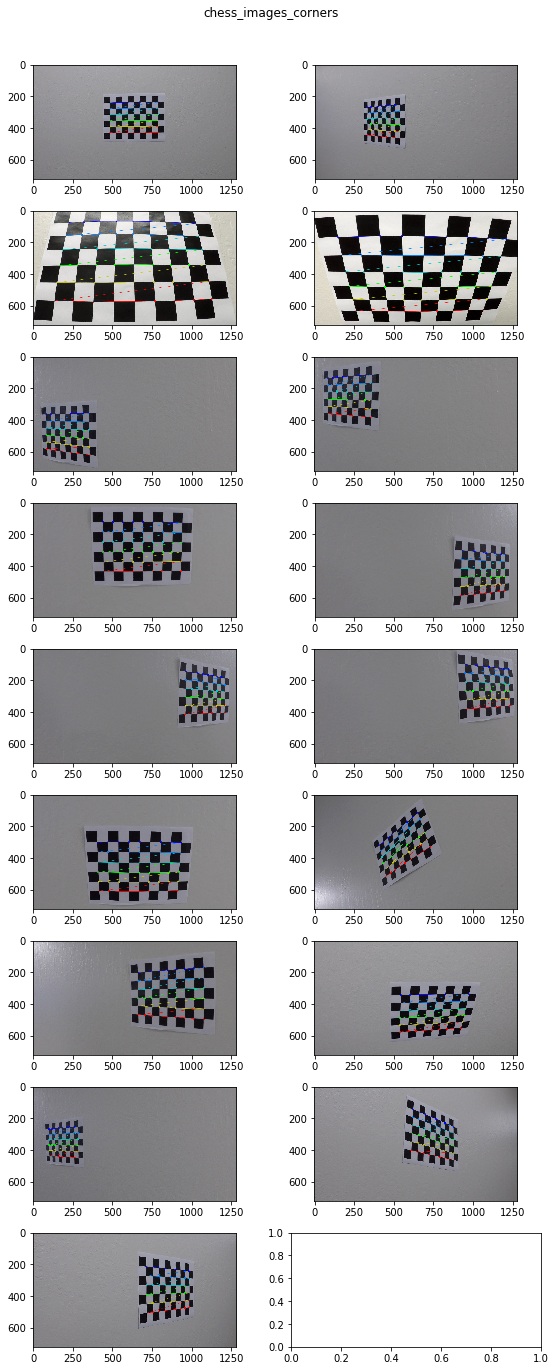

In [5]:
plot_images(chess_images_corners, 'chess_images_corners.png', 'chess_images_corners')

## Calibrate to calculate distortion coefficients, and test undistortion on an image!

In [14]:
calibration_pickle_file = './data/calibration_pickle.p'

if os.path.exists(calibration_pickle_file):
    calibration_pickle = pickle.load(open(calibration_pickle_file, 'rb'))
    mtx = calibration_pickle['mtx']
    dist = calibration_pickle['dist']
else:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size_chess, None, None)
    
    calibration_pickle = {}
    calibration_pickle['mtx'] = mtx
    calibration_pickle['dist'] = dist
    
    pickle.dump(calibration_pickle, open(calibration_pickle_file, 'wb'))

no


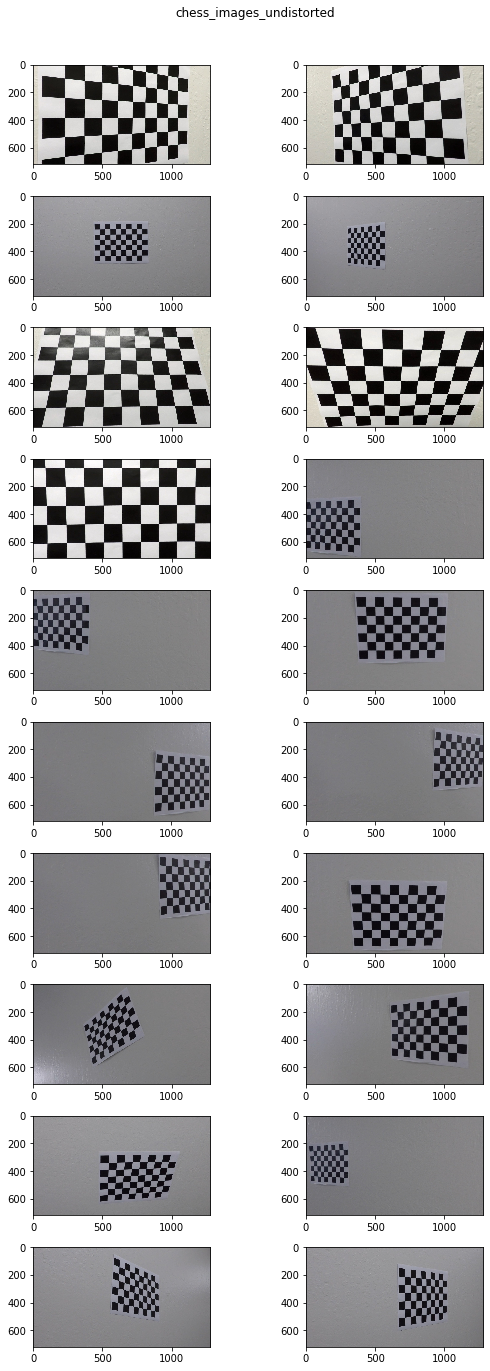

In [9]:
chess_images_np = [mpimg.imread(image) for image in chess_images]
chess_images_undistorted = [undistort(image) for image in chess_images_np]
plot_images(chess_images_undistorted, 'chess_images_undistorted.png', 'chess_images_undistorted')

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2